Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

Loading Dataset


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)
mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

Preprocessing Data

In [3]:
X = mnist.data.astype('float32')/255
y = mnist.target.astype('int64')
noise = np.random.normal(0, 0.1, X.shape)
X_noise = X + noise
# noisy_array = np.clip(noisy_array, 0, 1)

In [4]:
X.shape

(70000, 784)

Split Data

In [5]:
X_splits = {}
y_splits = {}
unique_labels = np.unique(y)
for label in unique_labels:
    X_splits[label] = X_noise[y == label]
    y_splits[label] = y[y == label]


In [6]:
X_17 = np.concatenate((X_splits[1],X_splits[7]),axis=0)
y_17 = np.concatenate((y_splits[1],y_splits[7]))

In [7]:
print(X_17.shape,y_17.shape)

(15170, 784) (15170,)


In [8]:
y_17_oh = y_17.copy()
y_17_oh[y_17_oh == 1] = 1
y_17_oh[y_17_oh == 7] = 0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_17,y_17_oh, test_size=0.20, random_state=42,shuffle=True)

In [10]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([5852, 6284]))

In [11]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([1441, 1593]))

In [12]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

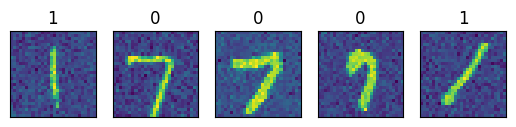

In [13]:
plot_example(X_train, y_train)

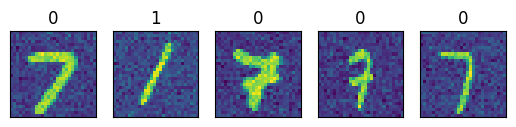

In [14]:
plot_example(X_test, y_test)

In [45]:
model = GaussianNB()
model.fit(X_train[:],y_train[:])

GaussianNB()

In [46]:
y_pred = (model.predict(X_test))
accuracy_score(y_test, y_pred)

0.982201713909031

In [56]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Input(shape=(784,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model = create_model()
model.fit(X_train[:1000],y_train[:1000],epochs = 5)
y_pred = (model.predict(X_test))>0.5
accuracy_score(y_test,y_pred)

Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 0.4582 - accuracy: 0.8610
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1697 - accuracy: 0.9810
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.9850
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0495 - accuracy: 0.9920
Epoch 5/5
95/95 [==============================] - 0s 1ms/step


0.9878048780487805